# Electricity Usage Analytics of all states in USA

## Modeling and Predictive Analysis

### Import Libraries and Packages

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to read data from URL
def read_data_from_URL(url):
    df=pd.read_csv(url)
    return df

In [3]:
data_url='https://raw.githubusercontent.com/nthammadi-uncc/electricity_usage_analysis/main/Data/final_electricity_data.csv'
electricity_analysis_df = read_data_from_URL(data_url)
electricity_analysis_df.head()

,Unnamed: 0,YEAR,STATE,STATE_NAME,ELECTION_RESULT,CHANGE_IN_GOVT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,...,GEOTHERMAL (BILLION BTU),NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
0,0,2001,AK,ALASKA,RED,0.0,0.003576,0.000000,0.014656,0.015239,...,0.000000,0.022883,0.00000,0.025847,57363.0,0.067115,0.073740,0.017295,0.006623,0.043238
1,1,2001,AL,ALABAMA,RED,0.0,0.457250,0.000000,0.091011,0.037604,...,0.000000,0.048055,0.05108,0.014785,35160.0,0.008211,-0.051074,0.294601,0.405428,0.424890
2,2,2001,AR,ARKANSAS,RED,0.0,0.156840,0.000000,0.027753,0.010589,...,0.000000,0.014917,0.00000,0.022526,33339.0,0.059380,0.052058,0.106483,0.073470,0.124335
3,3,2001,AZ,ARIZONA,RED,0.0,0.253720,0.000000,0.083029,0.050355,...,0.000000,0.068575,0.00000,0.010114,42704.0,0.045768,0.021301,0.175738,0.058488,0.220068
4,4,2001,CA,CALIFORNIA,BLUE,0.0,0.014141,0.929493,0.278179,0.437868,...,0.946401,0.544199,0.20317,0.092529,47262.0,0.278628,0.202604,0.267917,0.036000,0.265099


In [4]:
#drop the first column that is not needed
electricity_analysis_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
electricity_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YEAR                            969 non-null    int64  
 1   STATE                           969 non-null    object 
 2   STATE_NAME                      969 non-null    object 
 3   ELECTION_RESULT                 969 non-null    object 
 4   CHANGE_IN_GOVT                  969 non-null    float64
 5   COAL                            969 non-null    float64
 6   GEOTHERMAL                      969 non-null    float64
 7   HYDROELECTRIC CONVENTIONAL      969 non-null    float64
 8   NATURAL GAS                     969 non-null    float64
 9   NUCLEAR                         969 non-null    float64
 10  OTHER                           969 non-null    float64
 11  OTHER BIOMASS                   969 non-null    float64
 12  OTHER GASES                     969 

In [6]:
electricity_analysis_df.describe()

,YEAR,CHANGE_IN_GOVT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,OTHER,OTHER BIOMASS,OTHER GASES,...,GEOTHERMAL (BILLION BTU),NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT)
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,...,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000
mean,2010.000000,0.099071,0.207318,0.022688,0.057796,0.078763,0.157396,0.081559,0.124195,0.041092,...,0.021674,0.082928,0.039320,0.028975,52225.255934,0.038155,0.033997,0.164699,0.104565,0.141437
std,5.480054,0.298912,0.215022,0.133130,0.135739,0.142365,0.207461,0.131444,0.195485,0.109427,...,0.127710,0.147892,0.102257,0.086501,11028.859836,0.059653,0.060683,0.163050,0.159387,0.146084
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29359.000000,-0.269975,-0.291972,0.000000,0.000000,0.000000
25%,2005.000000,0.000000,0.022519,0.000000,0.005500,0.006916,0.000000,0.012946,0.007563,0.000000,...,0.000000,0.009105,0.000000,0.001210,43974.000000,0.006822,-0.001130,0.047935,0.010661,0.038578
50%,2010.000000,0.000000,0.159885,0.000000,0.015517,0.028549,0.091575,0.027419,0.034552,0.000000,...,0.000000,0.030287,0.000000,0.004865,50704.000000,0.032595,0.029944,0.126768,0.041925,0.102940
75%,2015.000000,0.000000,0.271722,0.000000,0.037068,0.082342,0.284197,0.108877,0.149413,0.017736,...,0.000000,0.086064,0.021462,0.021526,59094.000000,0.060750,0.067018,0.220702,0.112707,0.186051
max,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,95572.000000,0.377947,0.346392,1.000000,1.000000,1.000000


### Definition of Dataset:

The dataset has 969 rows and 29 features. List of features and their description is below:
<ol>
    <li>YEAR: Year ranging from 2001 to 2019</li>
    <li>STATE: Abbreviation of State</li>
    <li>STATE_NAME: Name of the State</li>
    <li>ELECTION_RESULT: This shows if the state during that year was under Republic(RED) or Democratic(BLUE) government</li>
    <b>Features 5-18 are related to Electricity Generation</b>
    <li>COAL</li>
    <li>GEOTHERMAL</li>
    <li>HYDROELECTRIC CONVENTIONAL</li>
    <li>NATURAL GAS</li>
    <li>NUCLEAR</li>
    <li>OTHER</li>
    <li>OTHER BIOMASS</li>
    <li>OTHER GASES</li>
    <li>PETROLEUM</li>
    <li>PUMPED STORAGE</li>
    <li>SOLAR THERMAL AND PHOTOVOLTAIC</li>
    <li>WIND</li>
    <li>WOOD AND WOOD DERIVED FUELS</li>
    <li>GENERATION_TOTAL: Total Electricity generated in the state during the year through all Energy sources</li>
    <b>Features 19-23 are related to Electricity Consumption</b>
    <li>COAL (SHORT TONS)</li>
    <li>GEOTHERMAL (BILLION BTU)</li>
    <li>NATURAL GAS (MCF)</li>
    <li>OTHER GASES (BILLION BTU)</li>
    <li>PETROLEUM (BARRELS)</li>
    <li>Median Income: Median Income of the state during the year</li>
    <li>PRICE_INFLATION_RATE: Rate at which the price of Electricity has been since the previous year</li>
    <li>ELECTRICITY_REVENUE_GROWTH: Growth of Revenue generated through Electricity</li>
    <b>Features 26-29 are related to Emissions - Carbondioxide, Sulphurdioxide and Nitricoxide in the state through the year</b>
    <li>Carbon_dioxide(MT)</li>
    <li>Sulphur_dioxide(MT)</li>
    <li>Nitric_oxide(MT)</li>
</ol>

## Exploring the variables

<AxesSubplot:xlabel='ELECTION_RESULT', ylabel='count'>

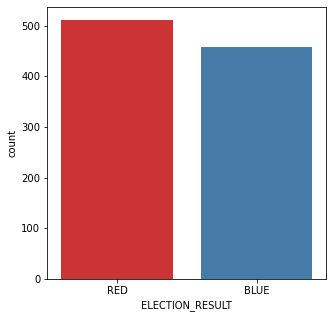

In [7]:
#bar graph of categorical variable - ELECTION_RESULT
plt.rcParams["figure.figsize"] = [5,5]
sns.countplot(x='ELECTION_RESULT', data=electricity_analysis_df, palette="Set1")

#### Data seems to be almost evenly distributed between Red and Blue states

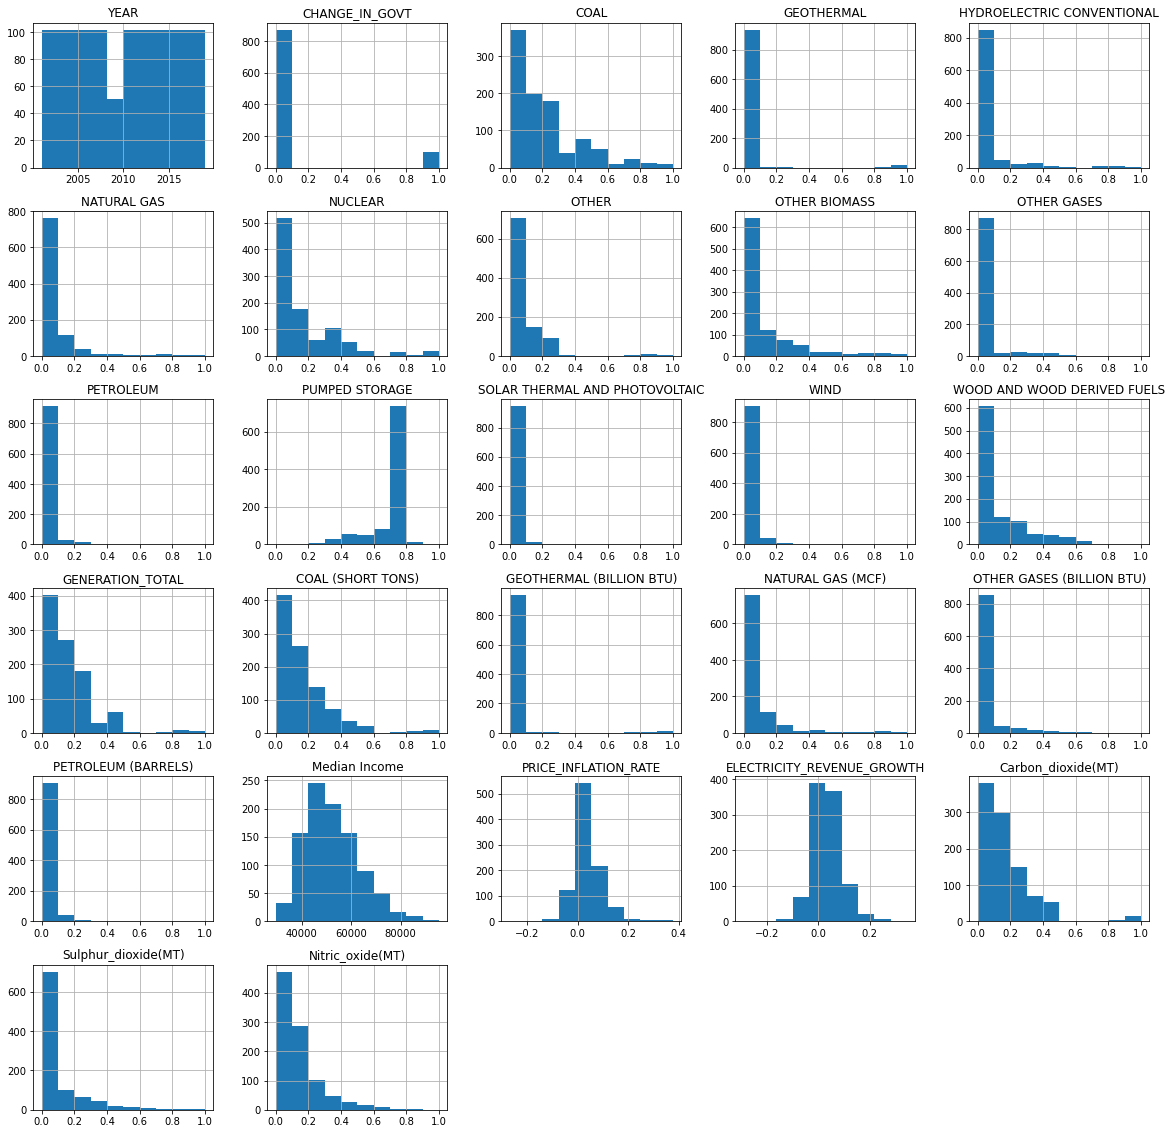

In [8]:
#The graphs shows how the data is distributed for every single attribute of the dataset
plt.rcParams["figure.figsize"] = [20,20]
electricity_analysis_df.hist()
plt.show()

#### We see some of the features are skewed

Text(0.5, 1.0, 'Electricity Generation Distribution - Total Generation')

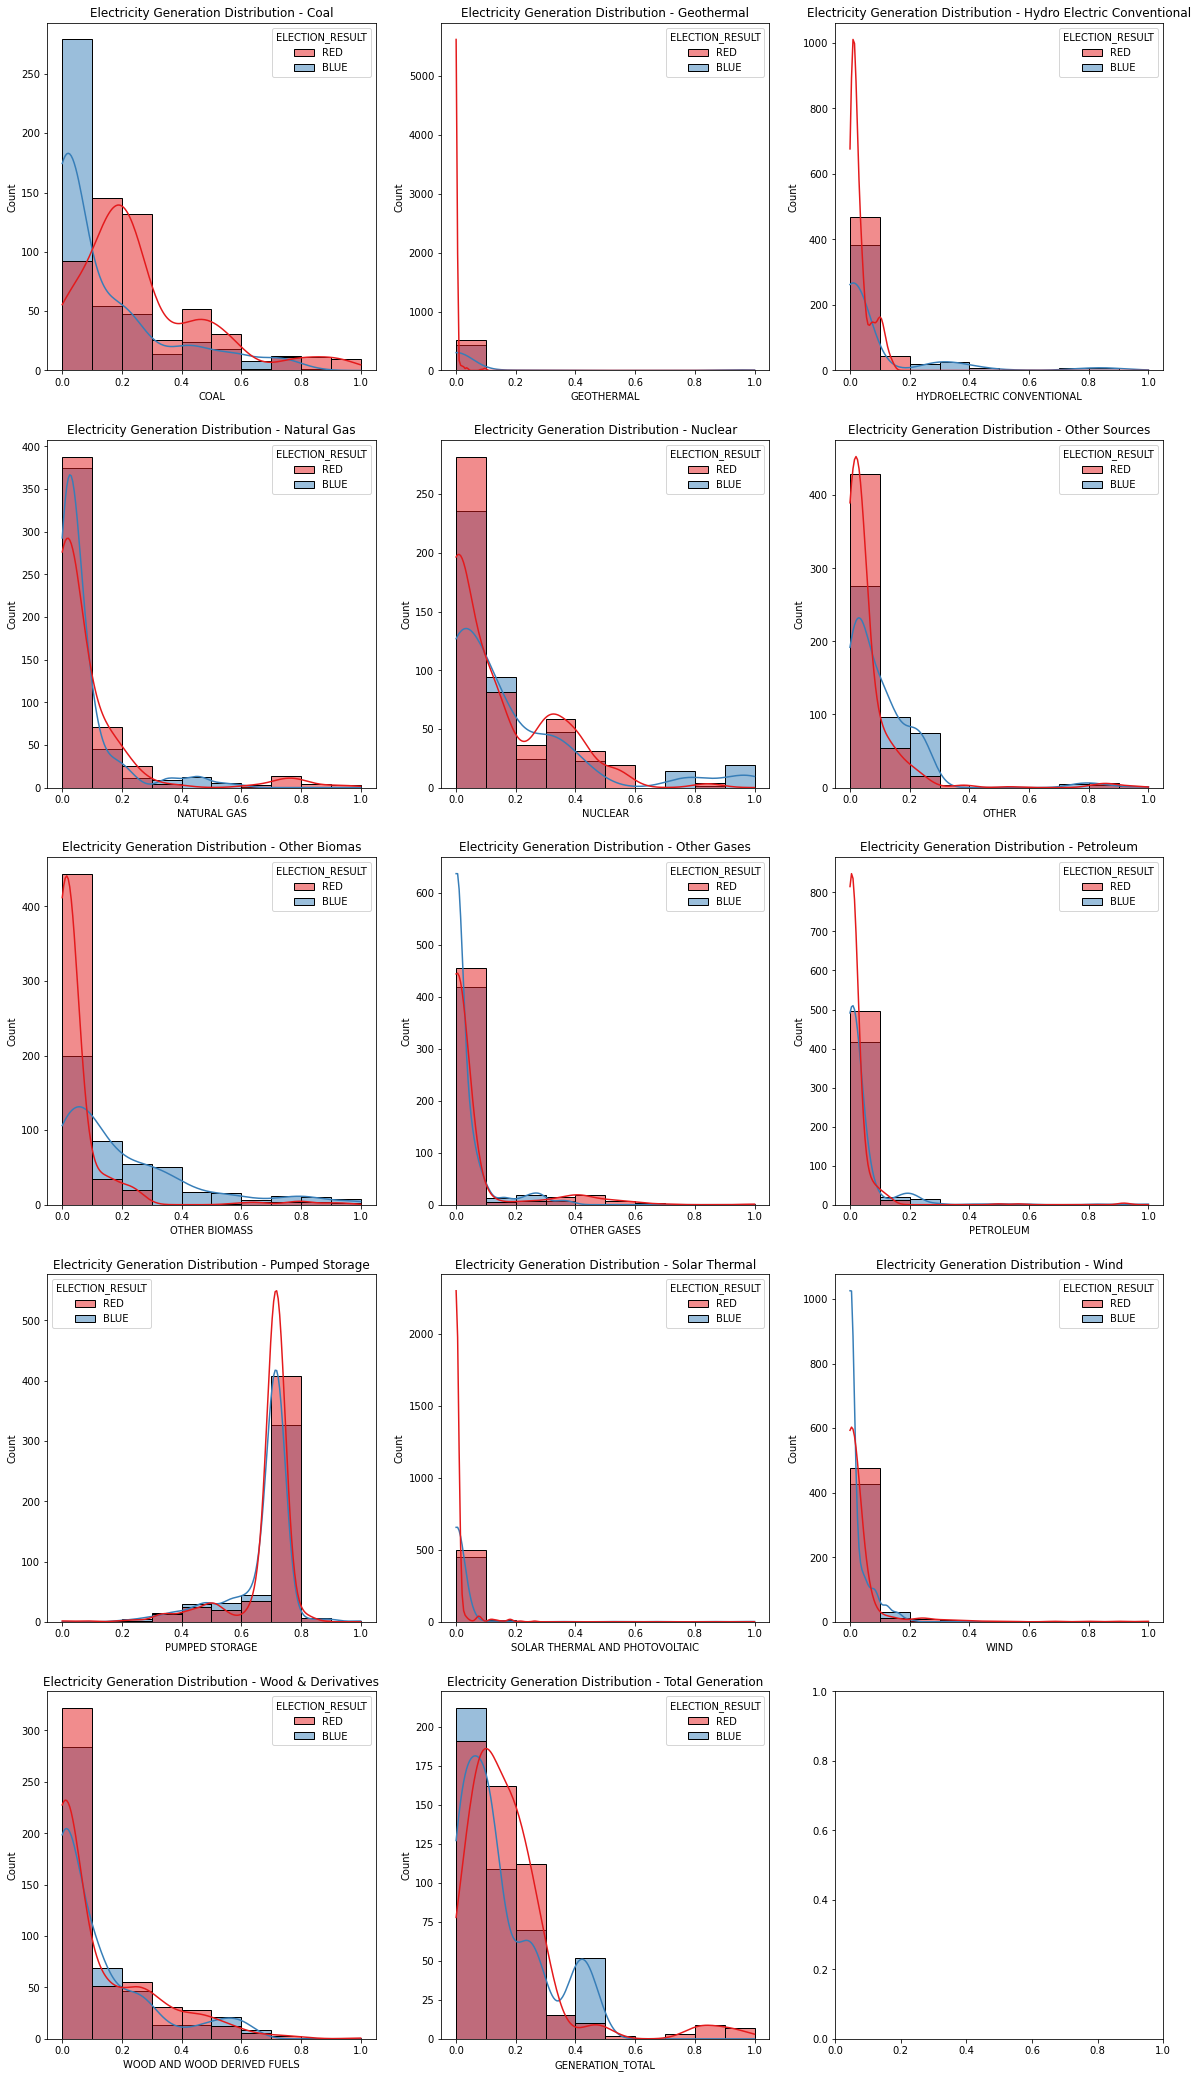

In [9]:
#Create univariate plots for Electricity Generation features
fig, axes = plt.subplots(5, 3, figsize=(20, 20))
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=1.5, wspace=None, hspace=None)
sns.histplot(ax=axes[0, 0], data=electricity_analysis_df, x='COAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 0].set_title('Electricity Generation Distribution - Coal')
sns.histplot(ax=axes[0, 1], data=electricity_analysis_df, x='GEOTHERMAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 1].set_title('Electricity Generation Distribution - Geothermal')
sns.histplot(ax=axes[0, 2], data=electricity_analysis_df, x='HYDROELECTRIC CONVENTIONAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[0, 2].set_title('Electricity Generation Distribution - Hydro Electric Conventional')
sns.histplot(ax=axes[1, 0], data=electricity_analysis_df, x='NATURAL GAS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 0].set_title('Electricity Generation Distribution - Natural Gas')
sns.histplot(ax=axes[1, 1], data=electricity_analysis_df, x='NUCLEAR', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 1].set_title('Electricity Generation Distribution - Nuclear')
sns.histplot(ax=axes[1, 2], data=electricity_analysis_df, x='OTHER', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[1, 2].set_title('Electricity Generation Distribution - Other Sources')
sns.histplot(ax=axes[2, 0], data=electricity_analysis_df, x='OTHER BIOMASS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 0].set_title('Electricity Generation Distribution - Other Biomas')
sns.histplot(ax=axes[2, 1], data=electricity_analysis_df, x='OTHER GASES', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 1].set_title('Electricity Generation Distribution - Other Gases')
sns.histplot(ax=axes[2, 2], data=electricity_analysis_df, x='PETROLEUM', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[2, 2].set_title('Electricity Generation Distribution - Petroleum')
sns.histplot(ax=axes[3, 0], data=electricity_analysis_df, x='PUMPED STORAGE', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 0].set_title('Electricity Generation Distribution - Pumped Storage')
sns.histplot(ax=axes[3, 1], data=electricity_analysis_df, x='SOLAR THERMAL AND PHOTOVOLTAIC', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 1].set_title('Electricity Generation Distribution - Solar Thermal')
sns.histplot(ax=axes[3, 2], data=electricity_analysis_df, x='WIND', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[3, 2].set_title('Electricity Generation Distribution - Wind')
sns.histplot(ax=axes[4, 0], data=electricity_analysis_df, x='WOOD AND WOOD DERIVED FUELS', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[4, 0].set_title('Electricity Generation Distribution - Wood & Derivatives')
sns.histplot(ax=axes[4, 1], data=electricity_analysis_df, x='GENERATION_TOTAL', hue="ELECTION_RESULT", palette="Set1", bins=10, kde=True, cbar=True)
axes[4, 1].set_title('Electricity Generation Distribution - Total Generation')

#### We see some trends with Red and Blue states, especially for Electricity generation using coal which is a little more in Red states. We also see blue state adopting Geothermal and Solar electricity generation slightly more than red states. Both have a similar trend towards wood and wooded derived fuels.

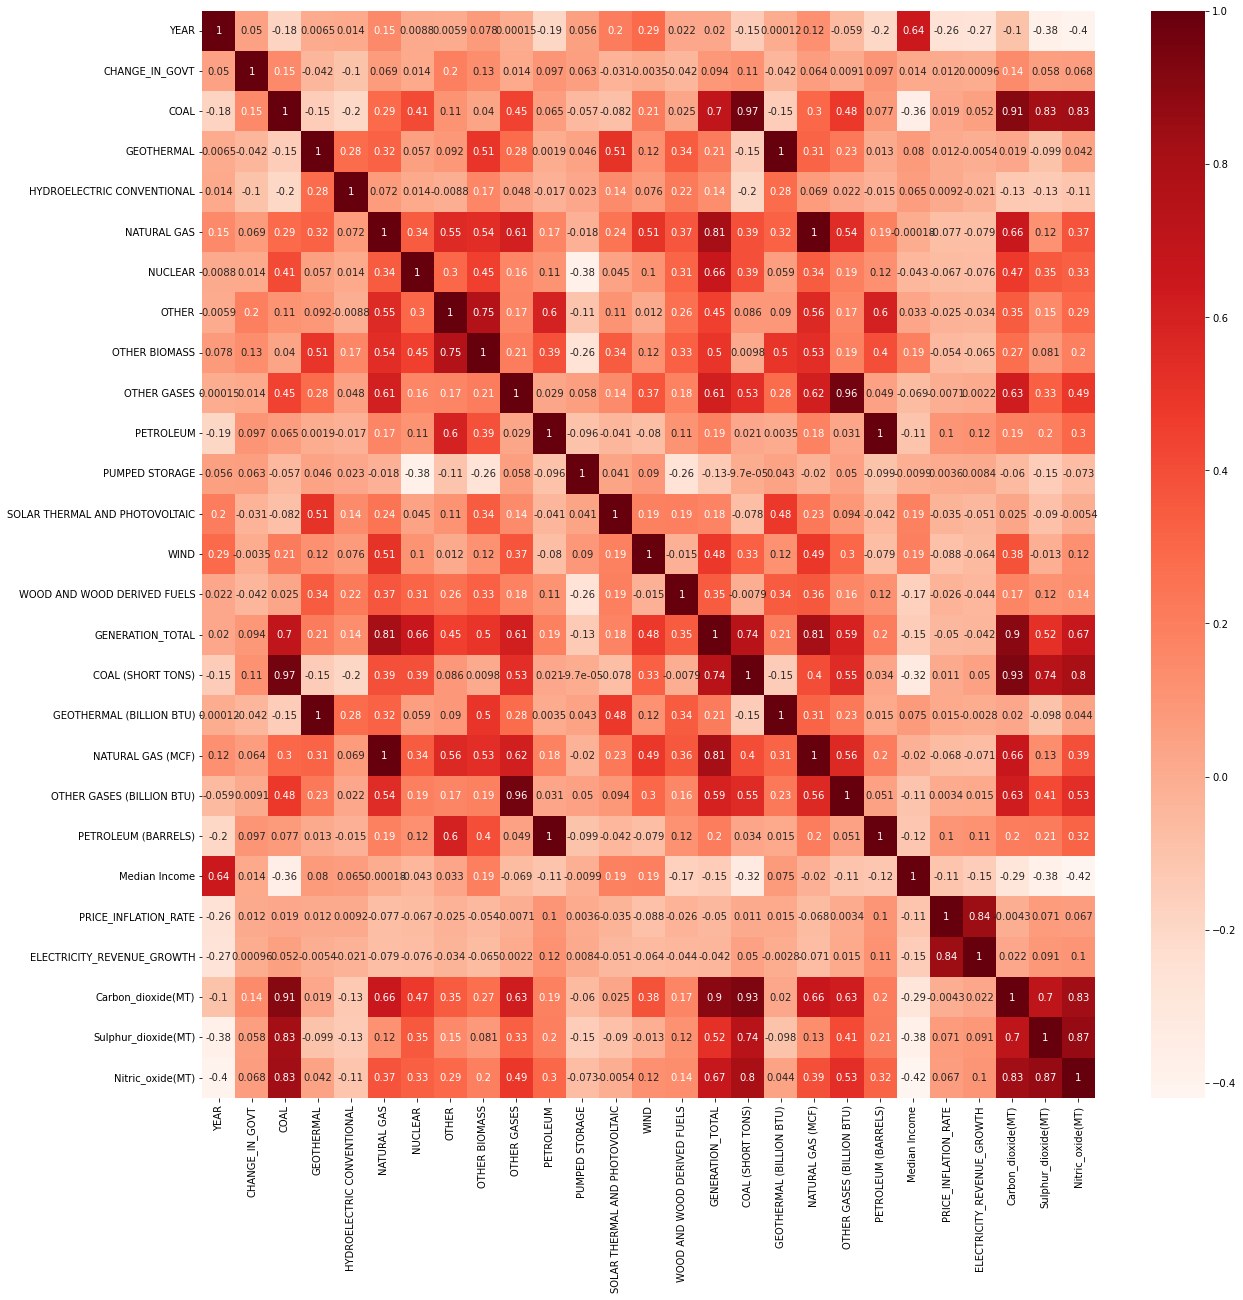

In [10]:
#Generate correlation matrix 
plt.figure(figsize=(20,20))
sns.heatmap(electricity_analysis_df.corr(), annot=True ,cmap='Reds')
plt.show()

### Correlation between variables

We see some strong correlations between variables within the dataset. Some of them are:
<ol>
    <li>Electricity Generation and Consumption using Coal are highly correlated.</li>
    <li>Electricity Generation and Consumption through Coal and Emissions(Carbon dioxide, Sulphur dioxide, Nitric oxide) are highly correlated</li>
    <li>Electricity Generation through Coal, Natural Gas, Nuclear and Other gases are also highly correlated to Generation Total which might indicate that a majority of contribution to Electricity Generation might be through these sources</li>
    <li>Electricity Generation and Consumption using Geothermal, Natural Gas, Other gases and Petroleum sources respectively are highly correlated.</li>
    <li>Electricity Generation through Geothermal and Solar Thermal sources are correlated.</li>
    <li>Electricity Price inflation rate and Revenue growth are highly correlated</li>
    <li>All Emissions(Carbon dioxide, Sulphur dioxide, Nitric oxide) are highly correlated to each other</li>
</ol>

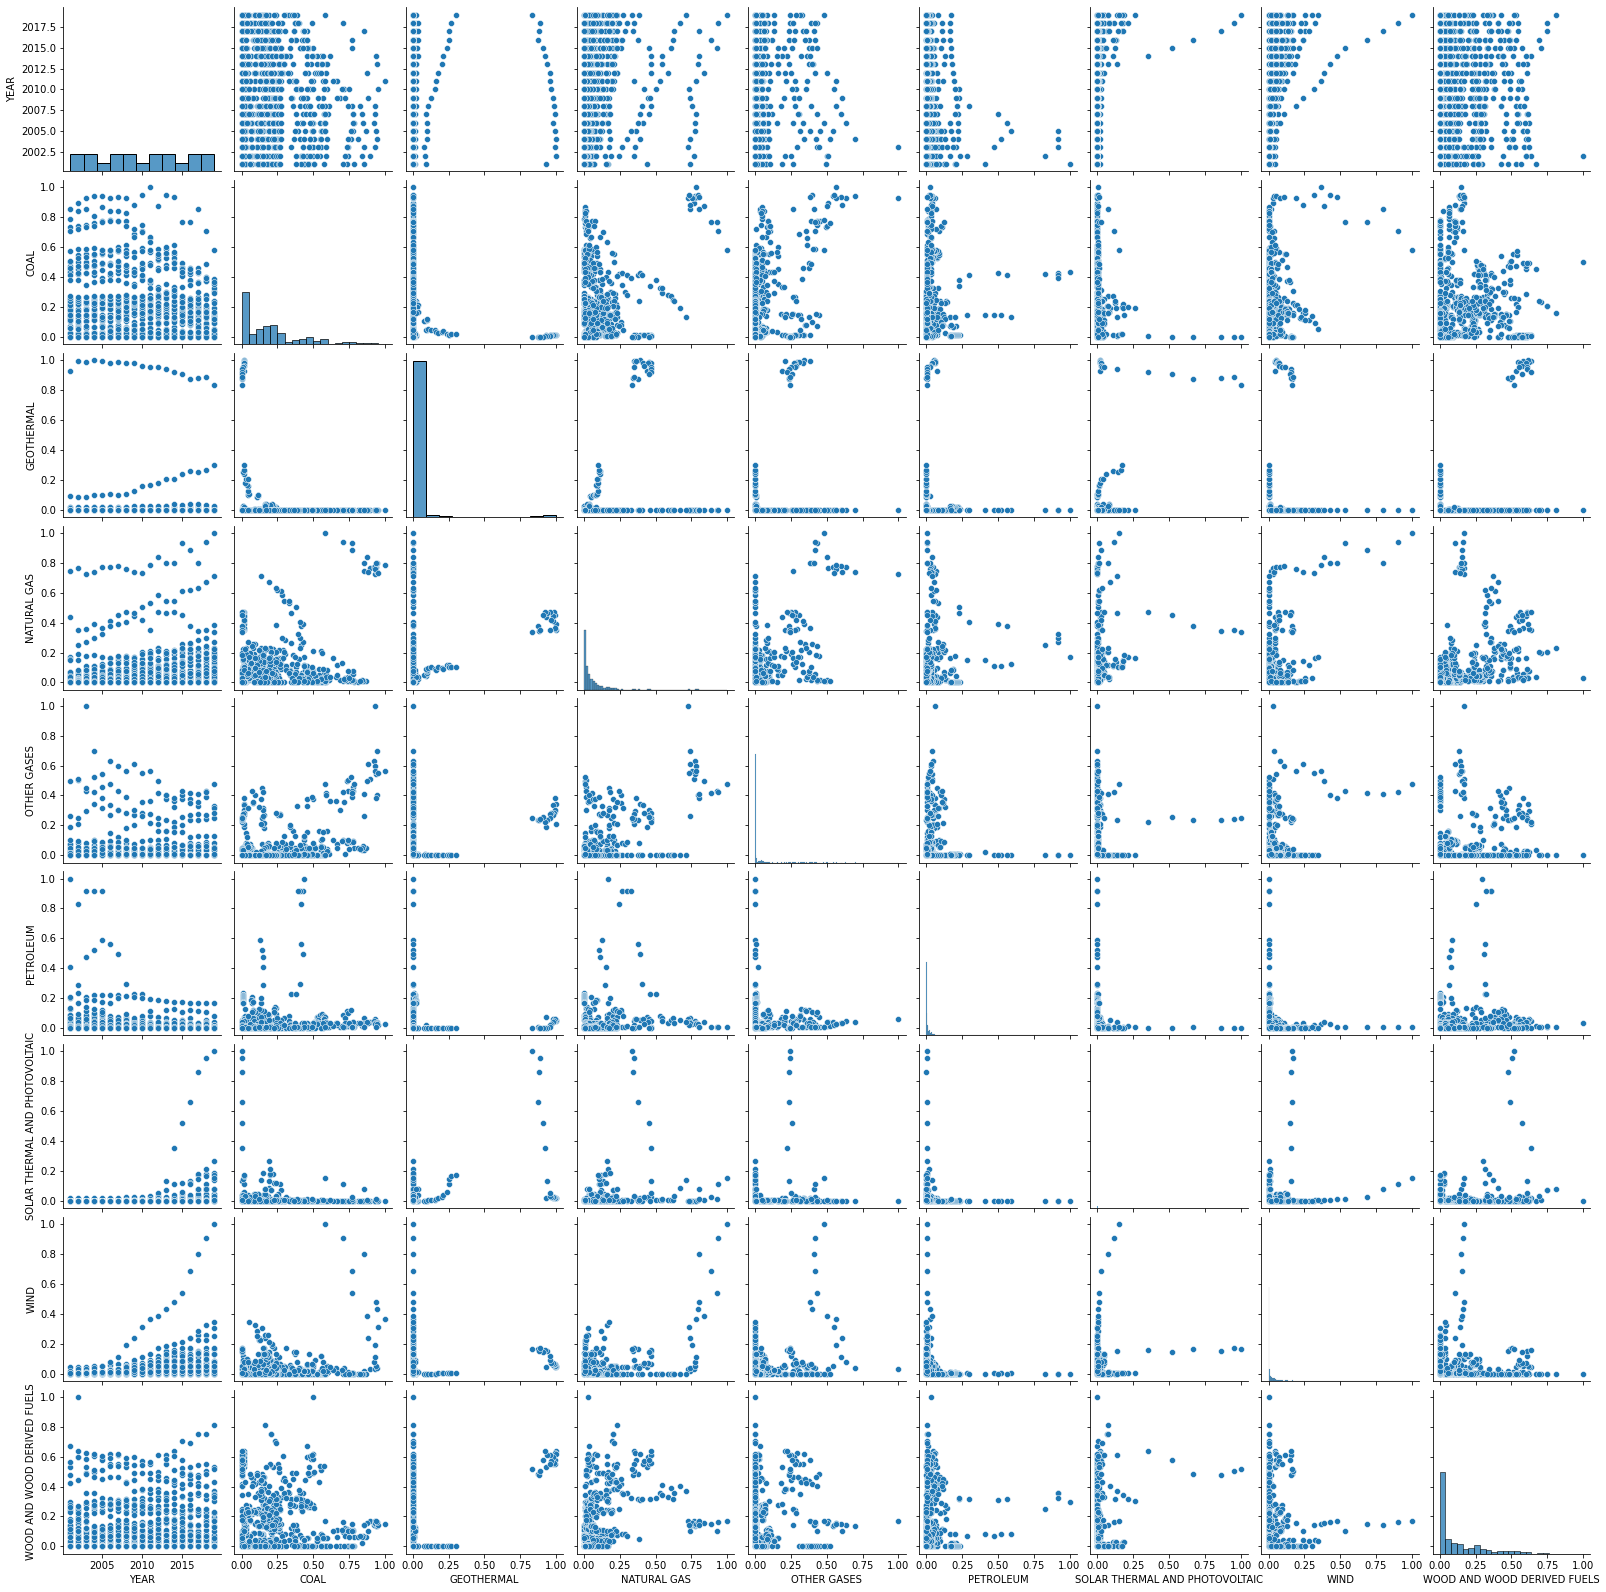

In [11]:
#pair plot between generation
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL','GEOTHERMAL','NATURAL GAS', 'OTHER GASES',
 'PETROLEUM',
 'SOLAR THERMAL AND PHOTOVOLTAIC',
 'WIND',
 'WOOD AND WOOD DERIVED FUELS']])

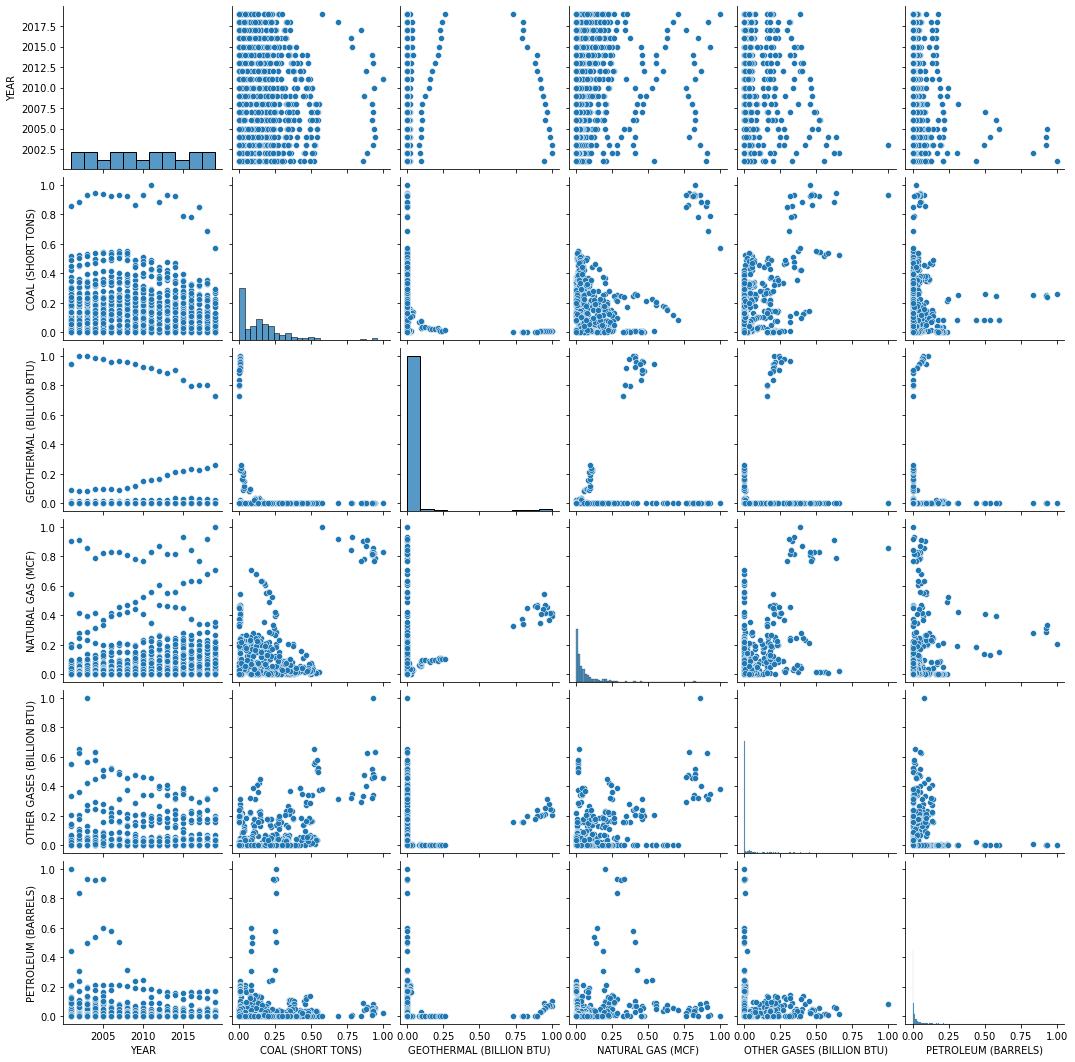

In [12]:
#pair plot between consumptions
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL (SHORT TONS)',
 'GEOTHERMAL (BILLION BTU)',
 'NATURAL GAS (MCF)',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM (BARRELS)']])

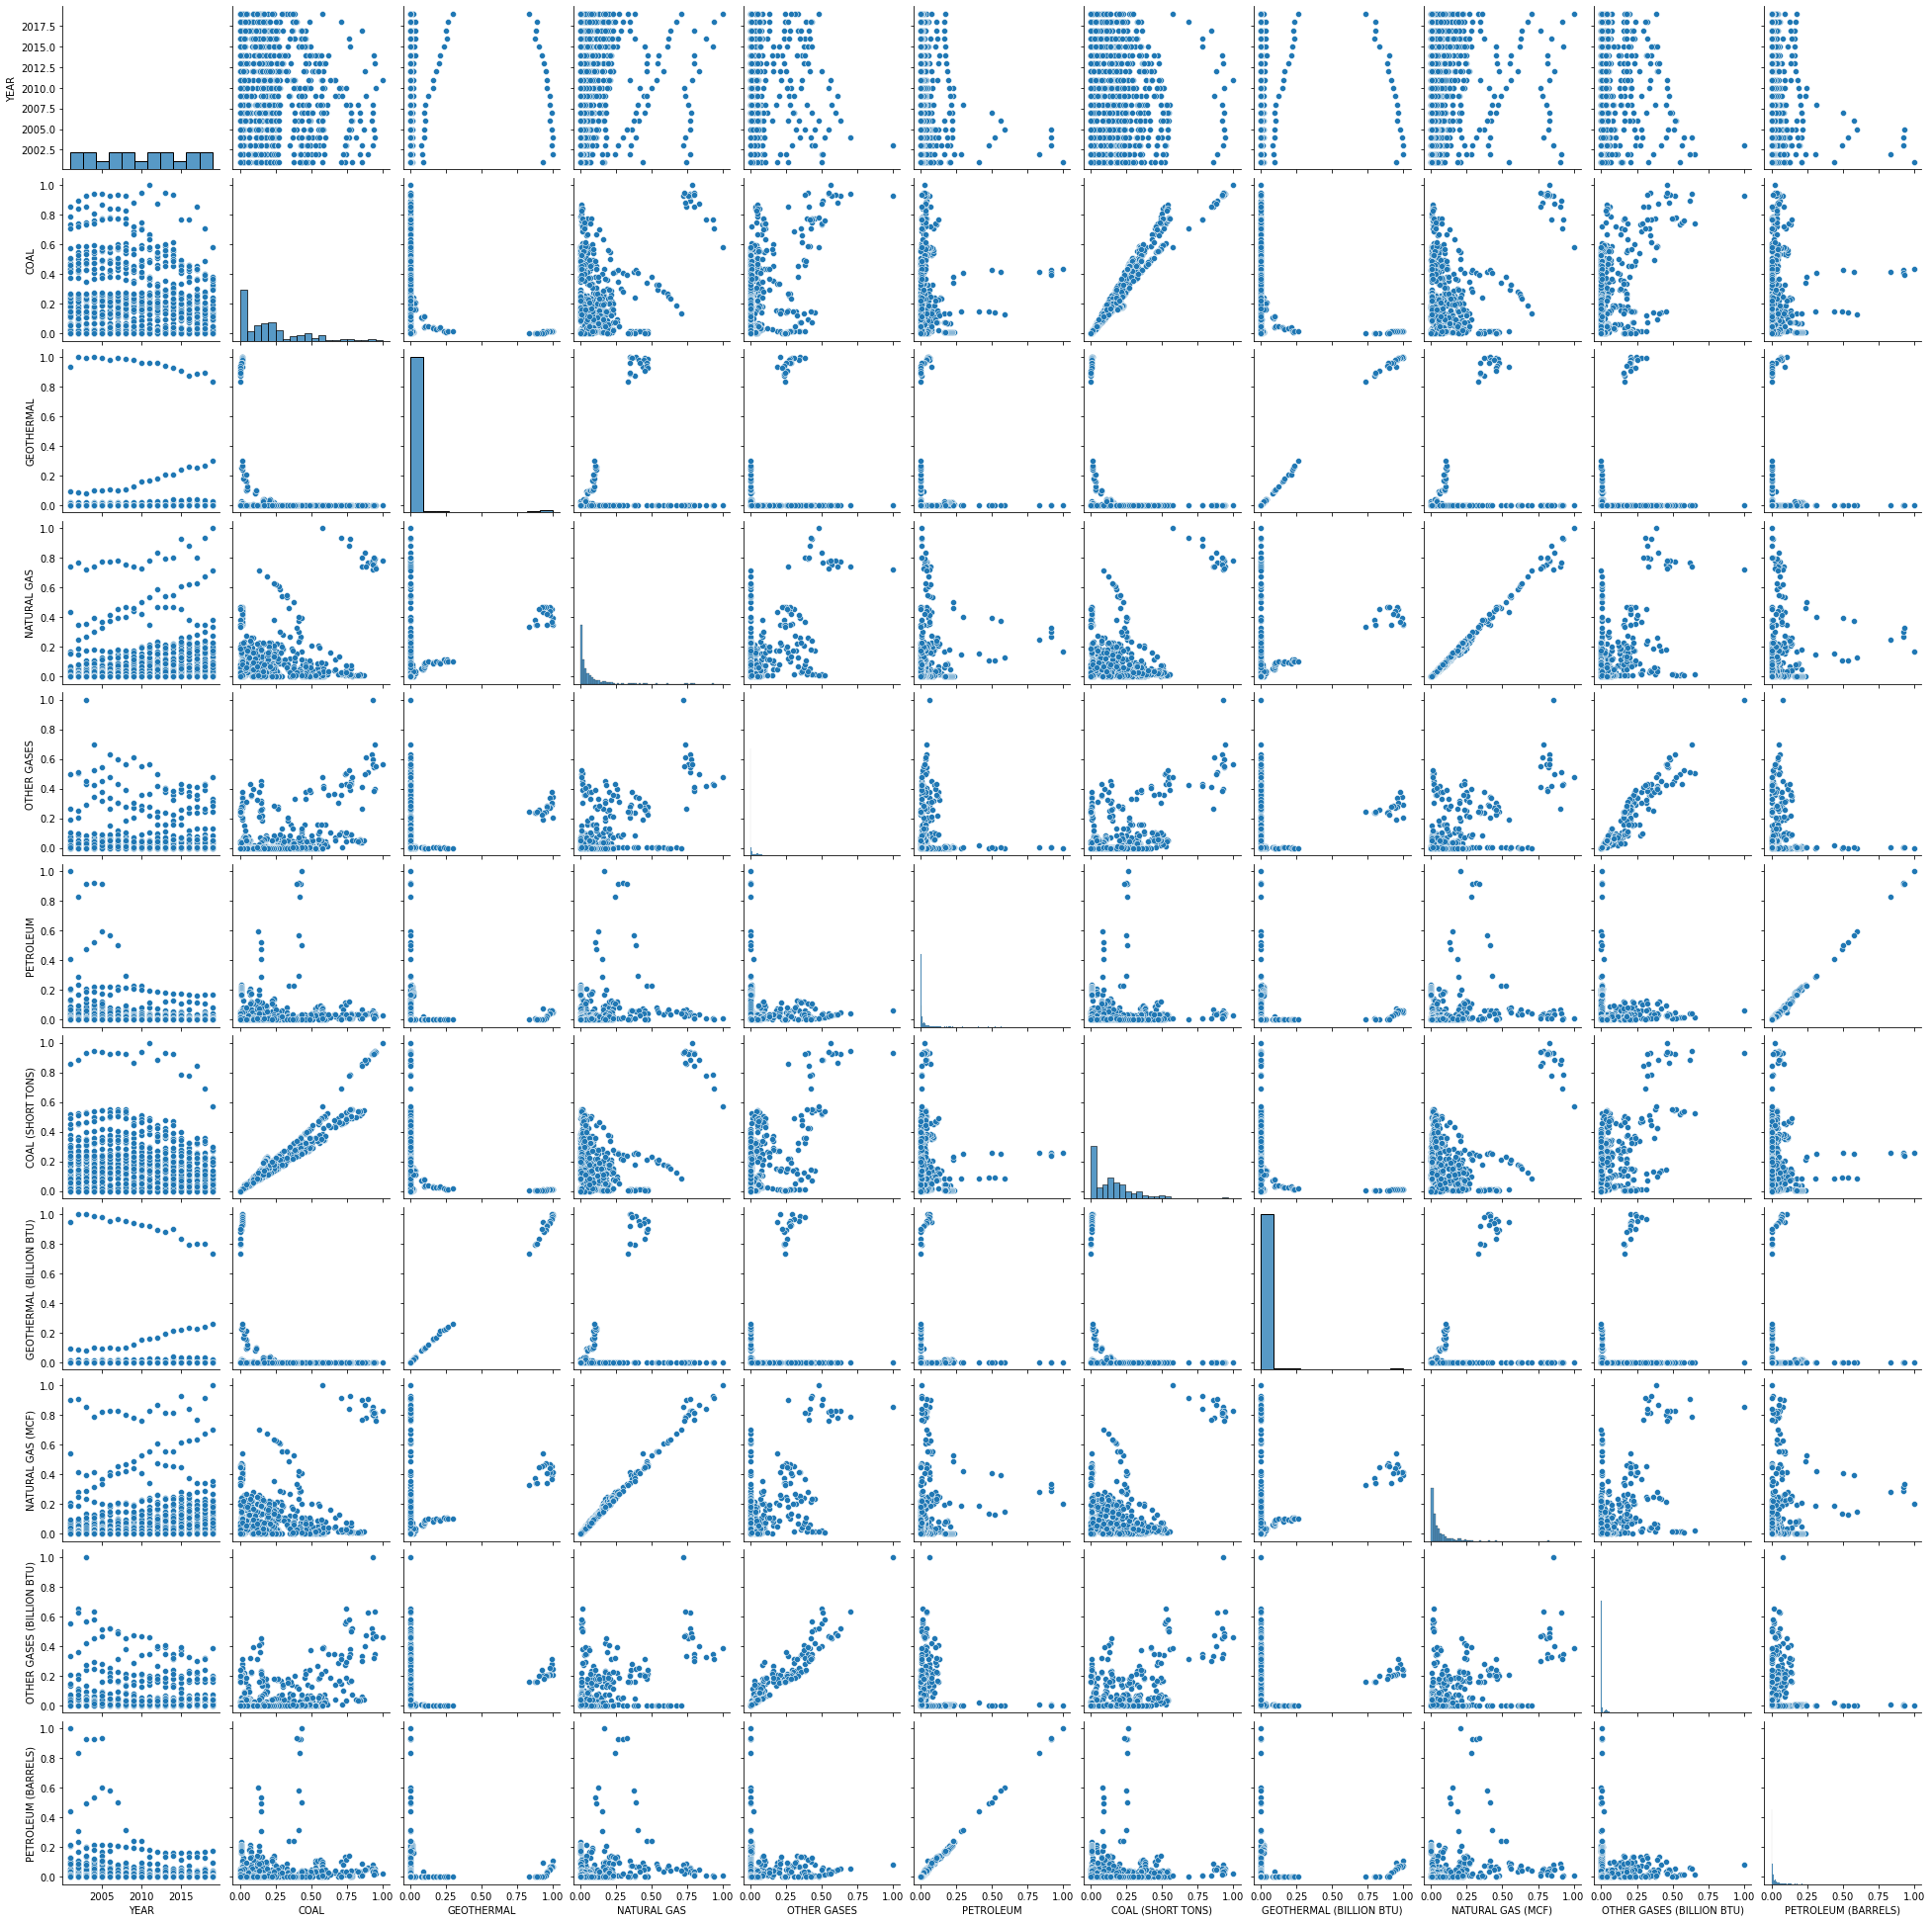

In [13]:
#pair plot between generation & consumption
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL',
 'GEOTHERMAL',
 'NATURAL GAS',
 'OTHER GASES',
 'PETROLEUM',
 'COAL (SHORT TONS)',
 'GEOTHERMAL (BILLION BTU)',
 'NATURAL GAS (MCF)',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM (BARRELS)']])

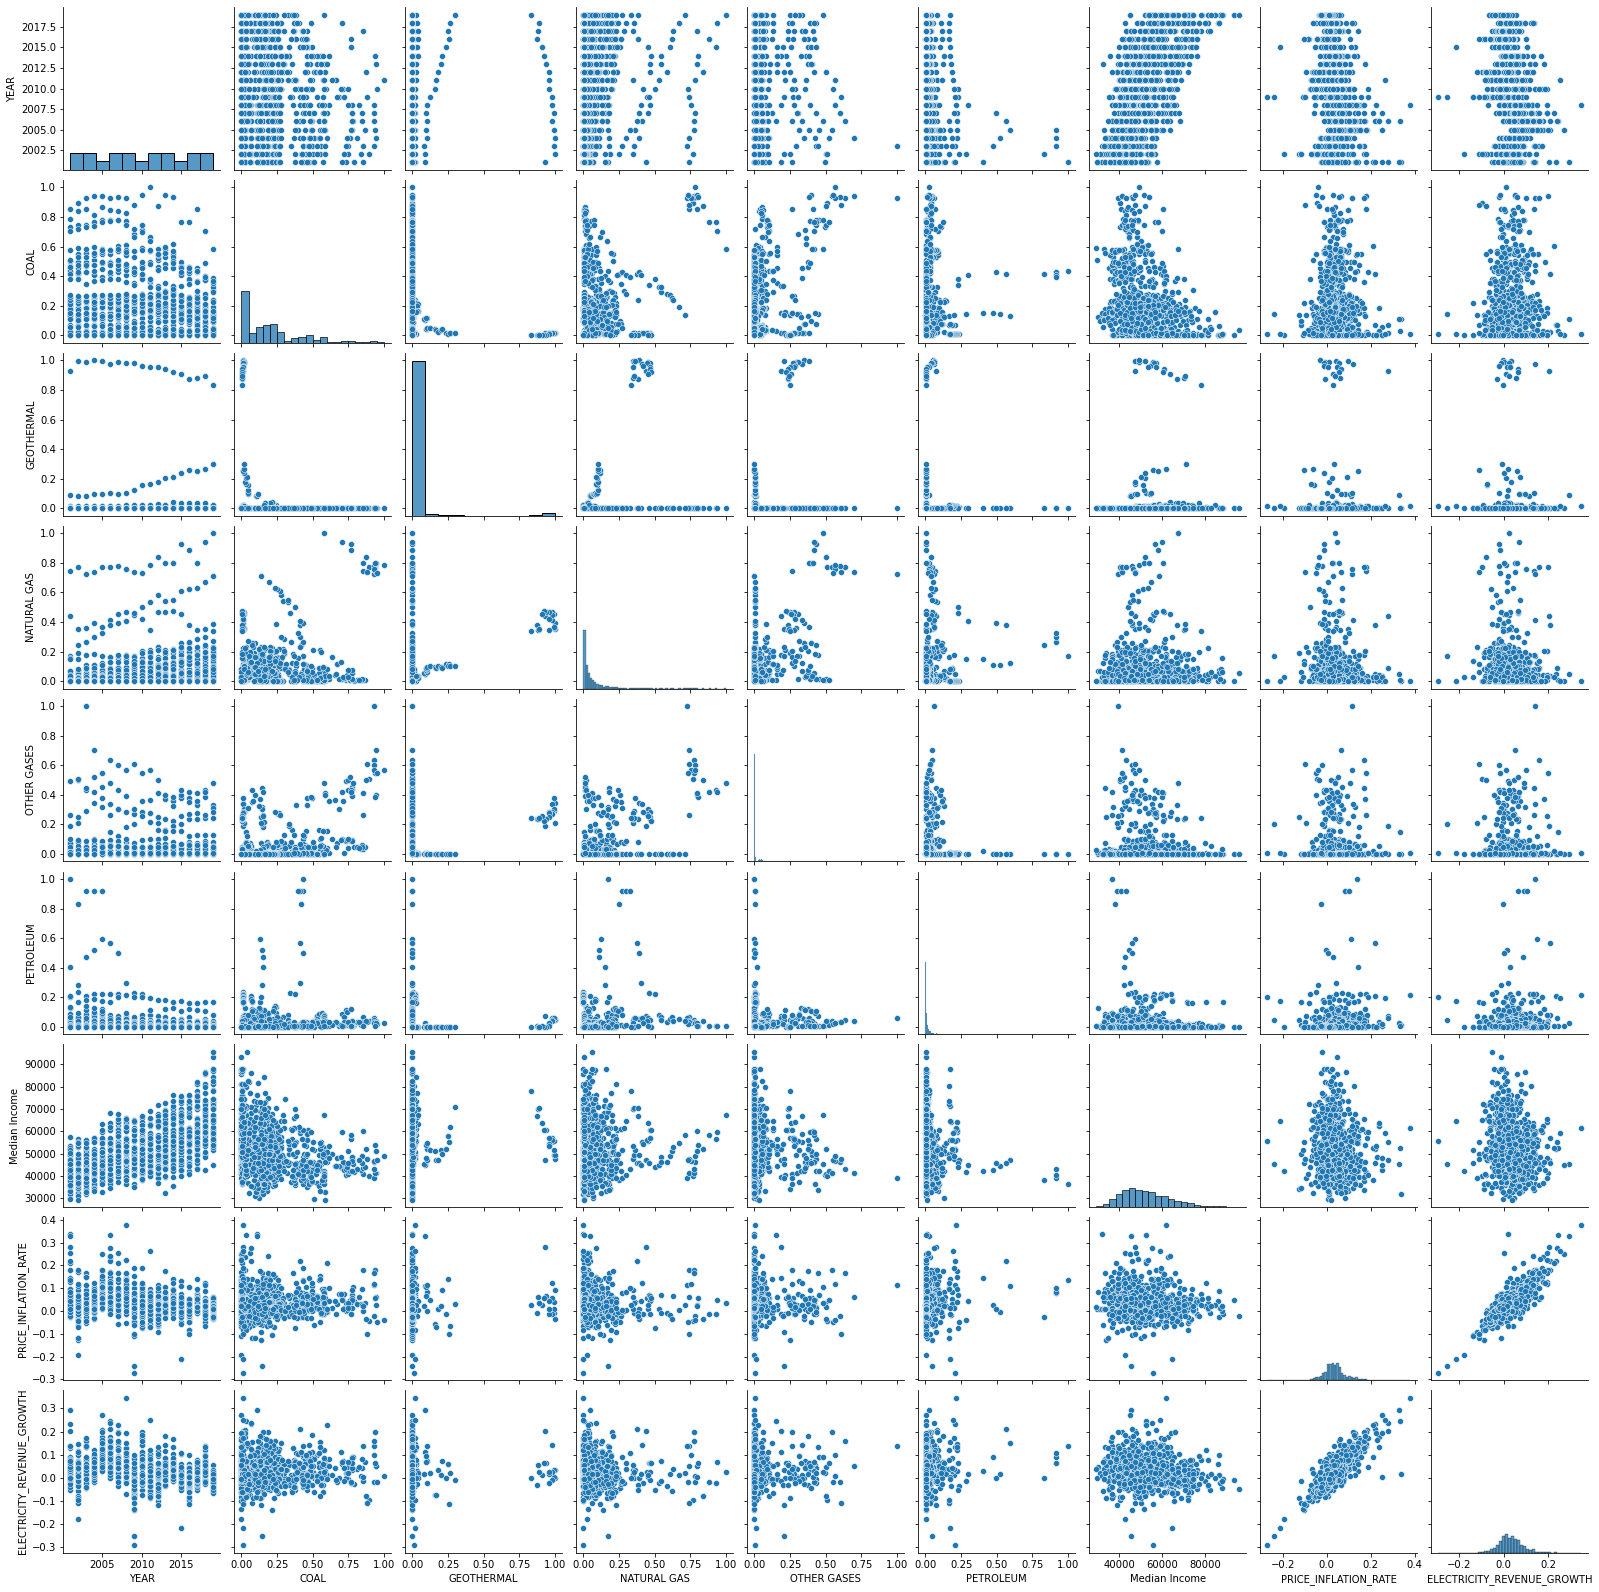

In [14]:
#pair plot between generation & price, income, revenue details
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT','COAL',
 'GEOTHERMAL',
 'NATURAL GAS',
 'OTHER GASES',
 'PETROLEUM',
 'Median Income',
 'PRICE_INFLATION_RATE',
 'ELECTRICITY_REVENUE_GROWTH']])

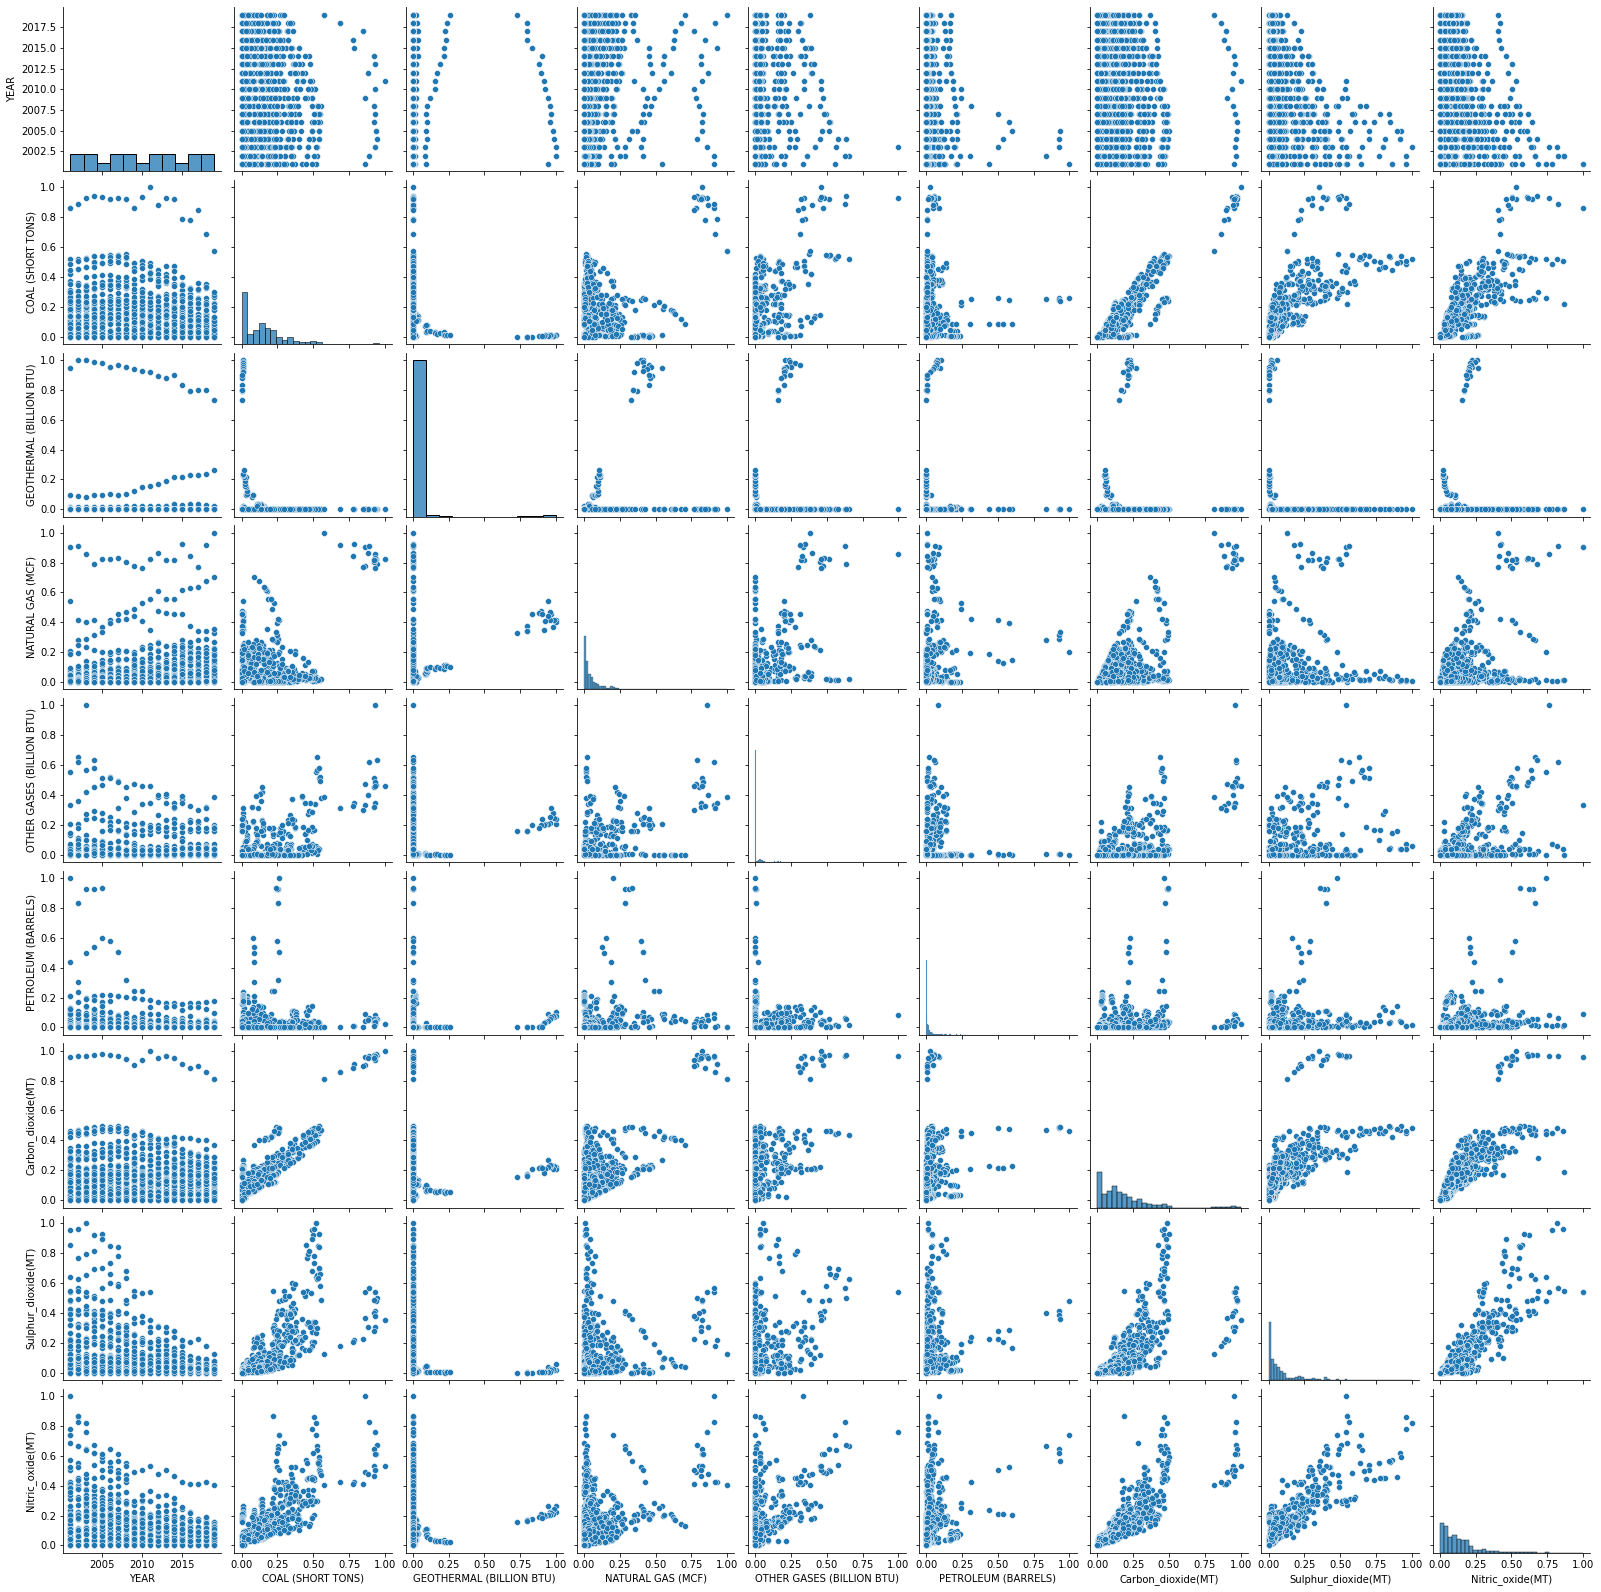

In [15]:
#pair plot between consumption & emissions
sns.pairplot(electricity_analysis_df[['YEAR','ELECTION_RESULT',
 'COAL (SHORT TONS)',
 'GEOTHERMAL (BILLION BTU)',
 'NATURAL GAS (MCF)',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM (BARRELS)',
 'Carbon_dioxide(MT)',
 'Sulphur_dioxide(MT)',
 'Nitric_oxide(MT)']])

## Feature Selection using Cross Validation

In [16]:
from sklearn import preprocessing

# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()
# FIT AND TRANSFORM
electricity_analysis_df['RULING_PARTY'] = electricity_analysis_df[['ELECTION_RESULT']].apply(le.fit_transform)
electricity_analysis_df.head()


,YEAR,STATE,STATE_NAME,ELECTION_RESULT,CHANGE_IN_GOVT,COAL,GEOTHERMAL,HYDROELECTRIC CONVENTIONAL,NATURAL GAS,NUCLEAR,...,NATURAL GAS (MCF),OTHER GASES (BILLION BTU),PETROLEUM (BARRELS),Median Income,PRICE_INFLATION_RATE,ELECTRICITY_REVENUE_GROWTH,Carbon_dioxide(MT),Sulphur_dioxide(MT),Nitric_oxide(MT),RULING_PARTY
0,2001,AK,ALASKA,RED,0.0,0.003576,0.000000,0.014656,0.015239,0.000000,...,0.022883,0.00000,0.025847,57363.0,0.067115,0.073740,0.017295,0.006623,0.043238,1
1,2001,AL,ALABAMA,RED,0.0,0.457250,0.000000,0.091011,0.037604,0.307458,...,0.048055,0.05108,0.014785,35160.0,0.008211,-0.051074,0.294601,0.405428,0.424890,1
2,2001,AR,ARKANSAS,RED,0.0,0.156840,0.000000,0.027753,0.010589,0.149701,...,0.014917,0.00000,0.022526,33339.0,0.059380,0.052058,0.106483,0.073470,0.124335,1
3,2001,AZ,ARIZONA,RED,0.0,0.253720,0.000000,0.083029,0.050355,0.290919,...,0.068575,0.00000,0.010114,42704.0,0.045768,0.021301,0.175738,0.058488,0.220068,1
4,2001,CA,CALIFORNIA,BLUE,0.0,0.014141,0.929493,0.278179,0.437868,0.336450,...,0.544199,0.20317,0.092529,47262.0,0.278628,0.202604,0.267917,0.036000,0.265099,0


In [17]:
#create the X and y for fitting to models
X=electricity_analysis_df[electricity_analysis_df.columns.difference(['ELECTION_RESULT','STATE','STATE_NAME','RULING_PARTY'])]
X.head()

,CHANGE_IN_GOVT,COAL,COAL (SHORT TONS),Carbon_dioxide(MT),ELECTRICITY_REVENUE_GROWTH,GENERATION_TOTAL,GEOTHERMAL,GEOTHERMAL (BILLION BTU),HYDROELECTRIC CONVENTIONAL,Median Income,...,OTHER GASES (BILLION BTU),PETROLEUM,PETROLEUM (BARRELS),PRICE_INFLATION_RATE,PUMPED STORAGE,SOLAR THERMAL AND PHOTOVOLTAIC,Sulphur_dioxide(MT),WIND,WOOD AND WOOD DERIVED FUELS,YEAR
0,0.0,0.003576,0.005399,0.017295,0.073740,0.013884,0.000000,0.000000,0.014656,57363.0,...,0.00000,0.023522,0.025847,0.067115,0.716191,1.778938e-07,0.006623,0.000011,0.000111,2001
1,0.0,0.457250,0.307881,0.294601,-0.051074,0.259351,0.000000,0.000000,0.091011,35160.0,...,0.05108,0.011146,0.014785,0.008211,0.716191,1.778938e-07,0.405428,0.000000,0.670928,2001
2,0.0,0.156840,0.137104,0.106483,0.052058,0.097599,0.000000,0.000000,0.027753,33339.0,...,0.00000,0.022103,0.022526,0.059380,0.716191,1.778938e-07,0.073470,0.000000,0.242036,2001
3,0.0,0.253720,0.183996,0.175738,0.021301,0.186014,0.000000,0.000000,0.083029,42704.0,...,0.00000,0.008181,0.010114,0.045768,0.804527,1.743782e-05,0.058488,0.000000,0.000111,2001
4,0.0,0.014141,0.008803,0.267917,0.202604,0.410958,0.929493,0.946401,0.278179,47262.0,...,0.20317,0.075690,0.092529,0.278628,0.604390,1.914038e-02,0.036000,0.041853,0.534509,2001


In [18]:
y=electricity_analysis_df['RULING_PARTY']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: RULING_PARTY, dtype: int32

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, y)

# summarize scores
set_printoptions(formatter={'float_kind':'{:f}'.format}, precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[0.319177 83.830341 86.786400 53.616141 6.737162 7.890854 26.082953
 25.780895 36.325310 156.573473 2.339644 2.746994 6.386695 51.257246
 33.293469 172.415646 6.156576 4.453100 8.981648 8.663634 1.931661
 3.818351 3.961162 21.517509 1.889115 0.271480 1.609120]
[[0.003576 0.005399 0.017295 57363.000000 0.000051]
 [0.457250 0.307881 0.294601 35160.000000 0.005923]
 [0.156840 0.137104 0.106483 33339.000000 0.002557]
 [0.253720 0.183996 0.175738 42704.000000 0.013420]
 [0.014141 0.008803 0.267917 47262.000000 0.714854]]


In [20]:
X.columns.to_list()

['CHANGE_IN_GOVT',
 'COAL',
 'COAL (SHORT TONS)',
 'Carbon_dioxide(MT)',
 'ELECTRICITY_REVENUE_GROWTH',
 'GENERATION_TOTAL',
 'GEOTHERMAL',
 'GEOTHERMAL (BILLION BTU)',
 'HYDROELECTRIC CONVENTIONAL',
 'Median Income',
 'NATURAL GAS',
 'NATURAL GAS (MCF)',
 'NUCLEAR',
 'Nitric_oxide(MT)',
 'OTHER',
 'OTHER BIOMASS',
 'OTHER GASES',
 'OTHER GASES (BILLION BTU)',
 'PETROLEUM',
 'PETROLEUM (BARRELS)',
 'PRICE_INFLATION_RATE',
 'PUMPED STORAGE',
 'SOLAR THERMAL AND PHOTOVOLTAIC',
 'Sulphur_dioxide(MT)',
 'WIND',
 'WOOD AND WOOD DERIVED FUELS',
 'YEAR']

#### Using SelectKBest approach with ANOVA F-value method, the best features are related to indexes: 0, 1, 2, 8, 12, 14 which are COAL,  COAL (SHORT TONS), Carbon_dioxide(MT), Median Income, Nitric_oxide(MT), OTHER BIOMASS

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 2  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    #cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

In [22]:
rfecv.fit(X,y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 6


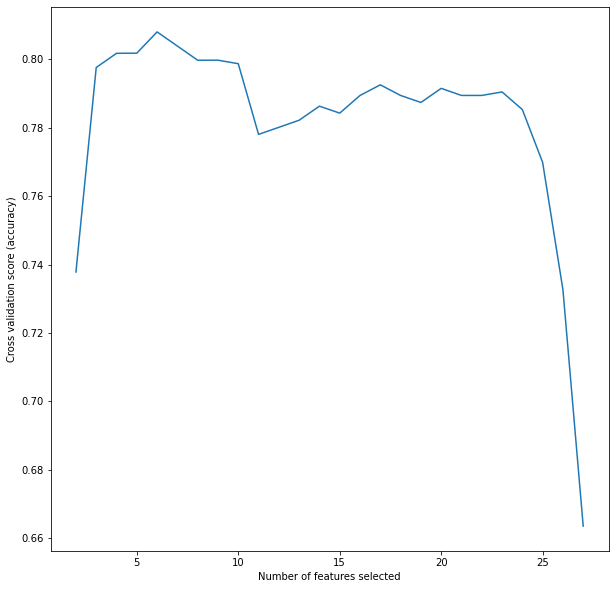

In [23]:
# Plot number of features VS. cross-validation scores
plt.rcParams["figure.figsize"] = [10,10]
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

### Random Forest Model 1

In [24]:
#import necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score 
from sklearn.model_selection import GridSearchCV

In [25]:
#partitioning of data by using 2 years as testing data
test_size = 102
X_train = X[:-test_size]
X_test = X[-test_size:]
y_train = y[:-test_size]
y_test = y[-test_size:]

In [26]:
#create model
rf = RandomForestClassifier(random_state=6156, n_jobs=-1)

In [27]:
#parameters for grid search
params = {
    'max_depth': [2,3,4,5,7,9,10],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,50,75,100]
}

In [28]:
#run grid search
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [29]:
#fit the model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=6156),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [30]:
#identify best parameters
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}

In [31]:
#get score of best model
grid_search.best_score_

0.9146132019115891

In [32]:
#prediction
prediction_labels = grid_search.predict(X_test)

In [33]:
#evaluation
results = confusion_matrix(y_test, prediction_labels)
print ('Confusion Matrix:')
print(results) 
print('Accuracy Score:',accuracy_score(y_test, prediction_labels))
print('Report:')
print(classification_report(y_test, prediction_labels))

Confusion Matrix:
[[44  0]
 [ 3 55]]
Accuracy Score: 0.9705882352941176
Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.95      0.97        58

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102



### Random Forest Model 2

In [34]:
#using the 6 best and 'Change_In_Govt'
X2 = electricity_analysis_df[['CHANGE_IN_GOVT', 'COAL', 'COAL (SHORT TONS)', 'Carbon_dioxide(MT)', 'Median Income', 'Nitric_oxide(MT)', 'OTHER BIOMASS']]

In [35]:
#partitioning of data
X2_train = X2[:-test_size]
X2_test = X2[-test_size:]
y2_train = y[:-test_size]
y2_test = y[-test_size:]

In [36]:
#fit the second model
grid_search.fit(X2_train, y2_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=6156),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [37]:
#identify best parameters
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 75}

In [38]:
#get score of best model
grid_search.best_score_

0.8891875746714457

In [39]:
#prediction
prediction_labels = grid_search.predict(X2_test)

In [40]:
#evaluation
results = confusion_matrix(y2_test, prediction_labels)
print ('Confusion Matrix:')
print(results) 
print('Accuracy Score:',accuracy_score(y2_test, prediction_labels))
print('Report:')
print(classification_report(y2_test, prediction_labels))

Confusion Matrix:
[[40  4]
 [10 48]]
Accuracy Score: 0.8627450980392157
Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        44
           1       0.92      0.83      0.87        58

    accuracy                           0.86       102
   macro avg       0.86      0.87      0.86       102
weighted avg       0.87      0.86      0.86       102



We created 2 Random Forest models. The first model used all the 26 features. The second model used the 6 best features we obtained and also used the feature 'CHANGE_IN_GOVT'.
For evaluation, we fitted the models with the training data,  and looked at the accuracy. The first model gave an accuracy of 97.05. The second model gave an accuracy  of 86.27.